<a href="https://colab.research.google.com/github/sebastian-dv/CSE-151A-Project/blob/main/Copy_of_Model_3_and_Final_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model 3 - Support Vector Machine

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
import xgboost as xgb

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/880/data.csv')
df = df[['age','sex','death','dzgroup','scoma','race','sps','aps','diabetes','dementia','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph']]

In [ ]:
# one hot encoding race
ohe = pd.get_dummies(df[['race']])
df = df.drop(['race'], axis = 1)
df = pd.concat([df, ohe], axis = 1)

# dropping nan values
df = df.dropna(axis = 0, how = 'any')

# encoding sex
df['sex'].replace('female', 0, inplace=True)
df['sex'].replace('male', 1, inplace=True)

# one hot encoding dzgroup
# ohe = pd.get_dummies(df[['dzgroup']])
# df = df.drop(['dzgroup'], axis = 1)

#label encode dzgroup
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['dzgroup'])

X = df.copy().drop(columns = 'dzgroup')
#y = ohe.copy()
df = pd.concat([df, ohe], axis = 1)

<ipython-input-3-b8fae055b1d6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'].replace('female', 0, inplace=True)
<ipython-input-3-b8fae055b1d6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'].replace('male', 1, inplace=True)


In [ ]:
fea_col = X.drop(columns='sex')
fea_col_name = fea_col.columns
print(fea_col_name)

Index(['age', 'death', 'scoma', 'sps', 'aps', 'diabetes', 'dementia', 'meanbp',
       'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod',
       'ph', 'race_asian', 'race_black', 'race_hispanic', 'race_other',
       'race_white'],
      dtype='object')


In [ ]:
X

,age,sex,death,scoma,sps,aps,diabetes,dementia,meanbp,wblc,...,alb,bili,crea,sod,ph,race_asian,race_black,race_hispanic,race_other,race_white
0,62.84998,1,0,0.0,33.898438,20.0,0,0,97.0,6.000000,...,1.799805,0.199982,1.199951,141.0,7.459961,0,0,0,1,0
6,62.37097,1,1,0.0,17.296875,46.0,0,0,78.0,11.699219,...,4.799805,0.399963,1.599854,132.0,7.479492,0,0,0,0,1
17,63.66299,0,1,26.0,40.296875,58.0,0,0,69.0,30.097656,...,2.899902,14.000000,2.899902,130.0,7.449219,0,0,0,0,1
22,49.61298,0,0,0.0,31.699219,42.0,0,0,67.0,11.000000,...,2.000000,4.099609,0.599976,130.0,7.399414,0,0,0,0,1
25,53.84000,1,1,0.0,14.199219,16.0,0,0,134.0,7.799805,...,3.799805,0.500000,0.799927,141.0,7.379883,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091,79.17596,1,0,9.0,22.097656,28.0,0,0,80.0,15.798828,...,3.000000,0.299988,0.699951,135.0,7.449219,0,0,0,0,1
9099,68.61597,0,0,0.0,15.298828,19.0,0,0,71.0,12.599609,...,4.099609,0.599976,0.799927,128.0,7.489258,0,0,0,0,1
9100,66.07300,1,0,0.0,16.296875,22.0,0,0,109.0,7.399414,...,3.699707,0.399963,1.099854,131.0,7.459961,0,0,0,0,1
9103,47.01999,1,1,0.0,40.195312,51.0,0,0,99.0,7.599609,...,1.199951,0.399963,3.500000,135.0,7.469727,0,0,0,0,1


### StandardScaler

In [ ]:
non_num_X = X.iloc[:, 19:]
num_X = X.drop(X.columns[19:], axis=1)
num_X = num_X.drop(columns=['sex'])

scaler = StandardScaler()
StandardScaler()

X_scaled = scaler.fit_transform(num_X)
X_scaled = np.concatenate([X_scaled, non_num_X.values], axis=1)

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)

# XgBoost


In [ ]:
model = xgb.XGBClassifier(objective='multi:softmax', max_depth=3, learning_rate=0.1, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.84      0.69       333
           1       0.47      0.45      0.46        96
           2       0.41      0.31      0.35        83
           3       0.57      0.16      0.25        49
           4       0.50      0.11      0.18        18
           5       0.74      0.58      0.65        77
           6       0.40      0.40      0.40        42
           7       0.83      0.21      0.34        70

    accuracy                           0.57       768
   macro avg       0.56      0.38      0.42       768
weighted avg       0.58      0.57      0.54       768



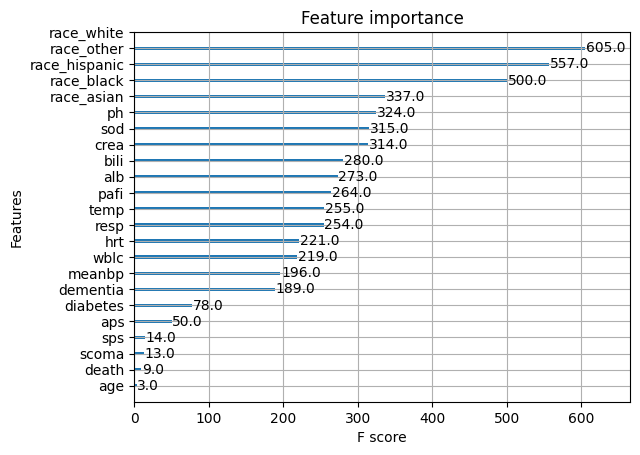

In [ ]:
xgb.plot_importance(model)
plt.yticks(range(len(fea_col_name)), fea_col_name)
plt.show()

In [27]:
from sklearn.model_selection import RandomizedSearchCV

model = xgb.XGBClassifier()

param_dist = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=25, scoring='accuracy', cv=3, verbose=1, random_state=0)

random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best parameters found:  {'subsample': 0.7, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.01}
Best accuracy found:  0.5794270833333334


In [ ]:
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier()

param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Fitting 3 folds for each of 375 candidates, totalling 1125 fits


# Gradient boosted Tree


In [ ]:
tree= GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=21)

# Train the model
tree.fit(X_train, y_train)

In [ ]:
y_pred = tree.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
y_pred = tree.predict(X_train)
print(classification_report(y_train,y_pred))

**oversampling for tree**

In [ ]:
smote = SMOTE(random_state=21)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
tree_oversampled = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=21)

# Train the model
tree_oversampled.fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred = tree.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
y_pred = tree.predict(X_train)
print(classification_report(y_train,y_pred))

# SVM

In [ ]:
# Create an Instance of SVM and Fit out the data.
# Data is not scaled so as to be able to plot the support vectors
svm = SVC(kernel ='poly', degree = 2)
svm.fit(X_train,y_train)
y_true = y_test
y_pred = svm.predict(X_test)
print(classification_report(y_true, y_pred, zero_division=0))
# Evaluate the accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

## Try to find optimiaze parameters


In [ ]:
# find the beter parameters
# test for best model

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}
# Create an SVM classifier
svm_classifier = SVC()
# Create the GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=3, scoring='accuracy')
# Fit the model with different hyperparameter combinations
grid_search.fit(X_train,y_train.idxmax(axis=1).values)
# Get the best hyperparameters
best_params = grid_search.best_params_
# Get the best model
best_model = grid_search.best_estimator_
# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test.idxmax(axis=1).values)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy}")

## OverSamplying with scaled data

### SMOTE


In [ ]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=21)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train.idxmax(axis=1).values)
# After oversampling
unique_classes_resampled, class_counts_resampled = np.unique(y_train_resampled, return_counts=True)
for class_label, count in zip(unique_classes_resampled, class_counts_resampled):
    print(f"Frequency of Class {class_label}: {count} instances")

### Evaluation

In [ ]:
svm_classifier = SVC(kernel='rbf', C = 10, gamma = 0.1)
svm_classifier.fit(X_train_resampled,y_train_resampled)
y_true = y_test.idxmax(axis=1).values
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_true, y_pred))
# Evaluate the accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

### RandomOverSampler

In [ ]:
rs = RandomOverSampler(random_state=11)
X_train_resampled, y_train_resampled = rs.fit_resample(X_train, y_train.idxmax(axis=1).values)
# After oversampling
unique_classes_resampled, class_counts_resampled = np.unique(y_train_resampled, return_counts=True)
for class_label, count in zip(unique_classes_resampled, class_counts_resampled):
    print(f"Frequency of Class {class_label}: {count} instances")


### Evaluation

In [ ]:
svm_classifier = SVC(kernel='rbf', C = 10, gamma = 0.1)
svm_classifier.fit(X_train_resampled,y_train_resampled)
y_true = y_test.idxmax(axis=1).values
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_true, y_pred))
# Evaluate the accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

# K-Nearest Neighbor

In [ ]:
#oversample.  we don't use because it decreases accuracy

# smote = SMOTE()
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
#KNN. similar result to SVM
k = 10
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_true = y_test
y_pred = knn_classifier.predict(X_test)
print(classification_report(y_true, y_pred, zero_division = 0))